<center> 
<b>Dataset Description
</center>
    
The following dataset was obtained by the UC Irvine Machine Learning Repository. The dataset contains a total of 76 attributes from the Cleaveland database that aims to predict the presense of heart disease in patients. We narrow down our attributes to 14 and perform exploratory analysis on on the following variables. 

| Variable | Description |
| :- | :- |
| age | age in years. |
| sex | 1 if male, 0 if female. |
| cp | chest pain type, (1 if typical angina, 2 if atypical angina, 3 if non-anginal pain, and 4 if asymptomatic). |
| trestbps | resting blood pressure (in mm Hg on admission to the hospital). |
| chol | serum cholestoral in mg/dl. |
| fbs | fasting blood sugar > 120 mg/dl, 1 = true; 0 = false. |
| restecg | resting electrocardiographic results. |
| thalach | maximum heart rate achieved. |
| exang | exercise induced angina, 1 = yes; 0 = no. |
| oldpeak | ST depression induced by exercise relative to rest. |
| slope | the slope of the peak exercise ST segment, (1 upsloping, 2 flat, and 3 downsloping). |
| ca | number of major vessels 0-3 colored by flourosopy. |
| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect. |
| target | diganosis of heart disease, 0 if < 50% diameter narrowing in other words no heart disease, 1 if >50% diameter narrowing. |


<center> 
<b>Data Cleaning/Preparation Process
</center>

Renaming columns, importing data, and data assignment:

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [4]:
# Ignoring warnings
warnings.filterwarnings('ignore')

In [5]:
heart = pd.read_csv('heart.csv')

In [6]:
# Visualizing data for cleanup
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In the figure above, we can see that the dataset contains 303 entries and does not contain any null values. We see this as each row represents a different variables and we can indentify that each column has "non-null" next to the number of entries. We will further verify these findings by using the isna() method. This method allows us to return a boolean object indicating whether or not theere are missing values in our dataframe. 

In [8]:
# Verifying is NA attributes in our dataset
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

To make our dataset understandable to the public we will reclassify some of the columns as its hard to discern what each variable measures. We will specifically target cp, trestbps, fbs, ca, chol, target, and sex.  

In [9]:
heart = heart.rename(columns={"cp": "chest_pain", 
                              "trestbps": "blood_pressure", 
                              "fbs": "blood_sugar", 
                              "ca": "vessels", 
                              "chol": "cholesterol"})

In [10]:
# Creating a new column names health_status
heart['health_status'] = heart['target']

In [11]:
# Altering health_status to be able to identify sick and healthy patients.
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [12]:
heart['gender'] = heart['sex']

In [13]:
heart.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,sick,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,sick,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,sick,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,sick,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,sick,0


In [14]:
heart.shape

(303, 16)

In [15]:
# Identifying duplicates
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,1


In our dataset it seems like entry 163 and 164 are actually the same entry twice. In order to create a consistent and unbiased model we will remove the following entry.

In [16]:
# Dropping the duplicated value
heart = heart.drop_duplicates(keep='first')

We will conduct a preliminary analysis of gender, fasting blood sugar, exercise induced angina, and health status within our dataset by performing cumulative counts. 

In [17]:
heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

We have 207 men within our sample and 96 women.

In [18]:
heart['blood_sugar'].value_counts()

0    257
1     45
Name: blood_sugar, dtype: int64

Within our dataset we have 45 individuals who have greater than 120 milligrams per decilitre. Demonstrating that within our sample, 45 individuals have high blood sugar levels. 

In [19]:
heart['exang'].value_counts()

0    203
1     99
Name: exang, dtype: int64

Within our dataset we have 99 individuals who experienced some form of chest pain caused by reduceed blood flow to the heart when exercising. In other words, 99 individuals who experienced an angina.

In [20]:
heart['health_status'].value_counts()

sick       164
healthy    138
Name: health_status, dtype: int64

Evaluating our health status variable we can seee that 165 individuals exhibit heart disease, while 138 have do not. This gives us a better understanding of the distribution amongst healthy and unhealthy individuals within our sample. 

# Insight 1: How do we create models with the greatest predictive power for patients with heart failure? Does distribution play an important role when fitting data in our model?

Distribution Plots:

<b>Figure #1

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'gender'}>, <AxesSubplot:>]],
      dtype=object)

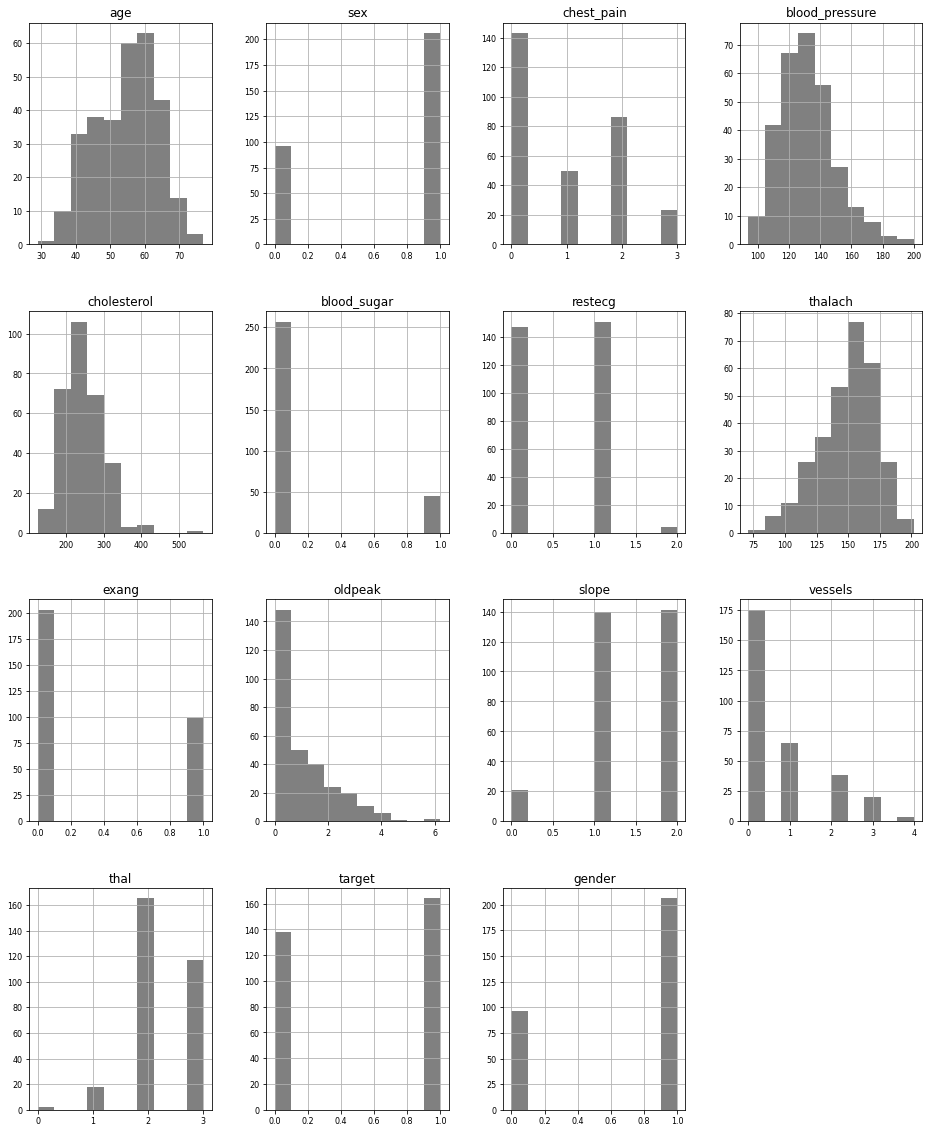

In [21]:
heart.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize=8, color='gray')

<center> 
<b>Correlation heatmap
</center>

<b>Figure #2

<AxesSubplot:>

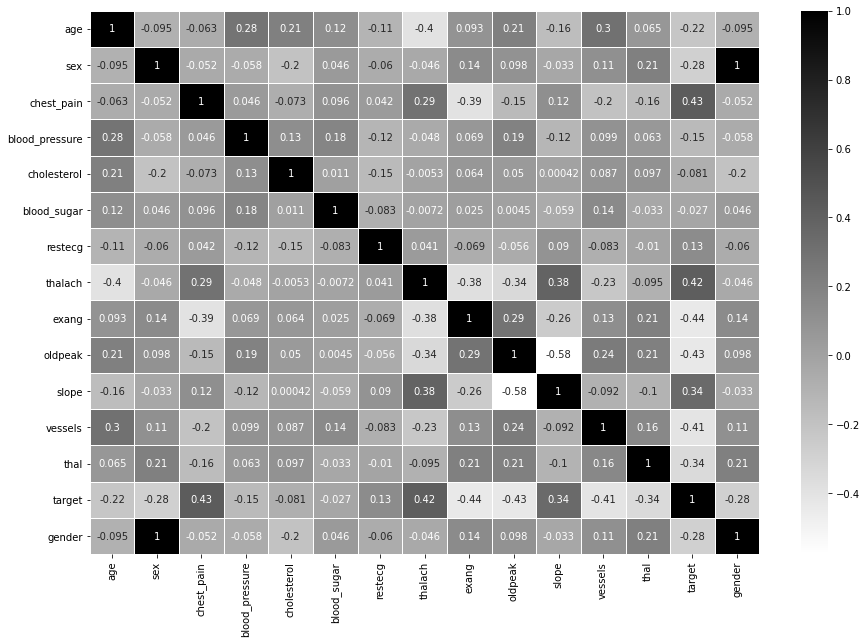

In [22]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heart.corr(),annot=True,cmap='binary',linewidths=.5)

<b> Snapshot of individual variables, creating grouped tables.

In [23]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
0       healthy           24
        sick              72
1       healthy          114
        sick              92
Name: gender, dtype: int64

114 individuals in our sample who are men are considered healthy, 93 are considered sick and have heart disease. 24 individuals in our sample who are women are considered healthy, 72 of them are considered sick and have heart disease.

In [24]:
print(f"Proportion of women who are healthy: {24/(24+72) *100 }%.")

Proportion of women who are healthy: 25.0%.


In [25]:
print(f"Proportion of men who are healthy: {114/(114+93) *100 }%.")

Proportion of men who are healthy: 55.072463768115945%.


<AxesSubplot:xlabel='gender', ylabel='count'>

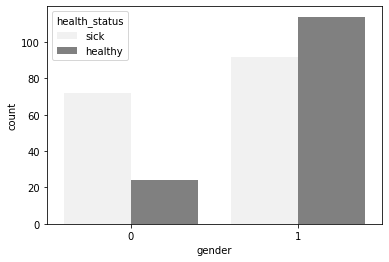

In [26]:
sns.countplot(data=heart, x='gender', hue='health_status', color="gray")


<b> Distribution of heart diseease between categories of chest pain

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

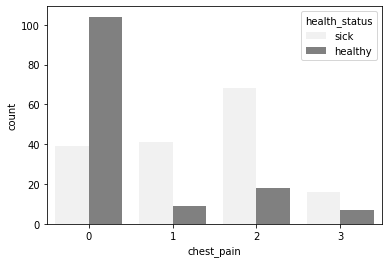

In [27]:
sns.countplot(data=heart, x='chest_pain', hue='health_status', color='gray')


In [28]:
heart['chest_pain'].corr(heart['target'])


0.432079591566407

<b> Heart disease amongst different categories of slope

<AxesSubplot:xlabel='slope', ylabel='count'>

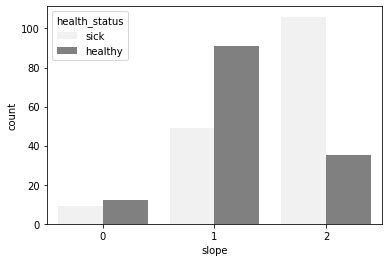

In [29]:
sns.countplot(data=heart, x='slope', hue='health_status', color = 'gray')


In [30]:
heart['slope'].corr(heart['target'])


0.34393953248938663

<b> Distribution of heart disease with our stress test variable

<AxesSubplot:xlabel='thalach', ylabel='Density'>

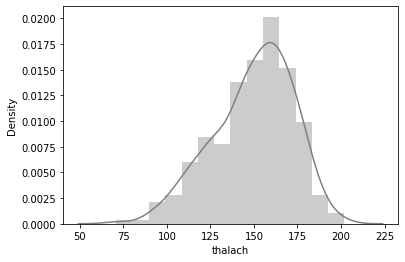

In [31]:
sns.distplot(heart['thalach'], color = 'gray')


<AxesSubplot:xlabel='thalach', ylabel='count'>

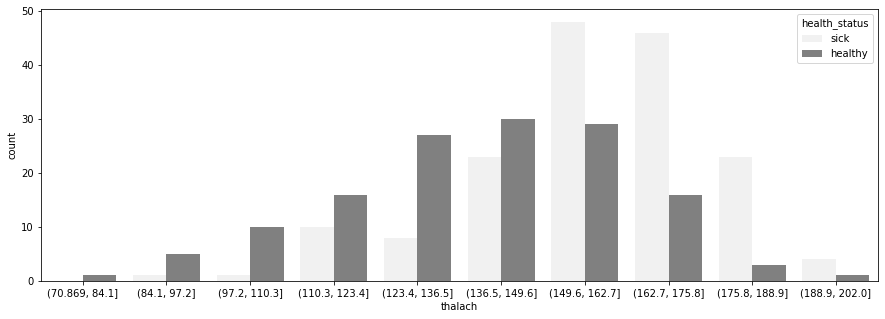

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heart, x=pd.cut(heart['thalach'], 10), hue='health_status', color = 'gray')

In figure 1 we get a general idea of how our data is distributed. We can see that age group follows a normal distribution. While variables such as blood pressure, cholesterol, and blood peak are right skewed distributions. thalach, our stress test variable, is left skewed. Information gathered in figure 1 is pertinent when estimating the Regression as often the distribution is a big factor in creating an accurate model. For example, binary variables  take on the values of either 0 and 1. In our dataset, our sex variable follows this type of behavior and if we were to try an regress other independent variables onto this binary variable our results will not be accurate when using a linear model. Using a linear model will produce results outside of the bounds of 0 to 1 and simply would not make sense as 0 and 1 are variables that categorize whether an individual is male or female. A better model that would emulate this behavior of taking on values of 0 and 1 could be best modeled using a probit regression. In figure 2, we create a correlation plot amongst variables. We aim to identify strong relationships in order to create the best fitting model using machine learning techniques. We must ensure that the independent variables that we apply in our model have a correlation to our dependent variable in order to help determine if there is any predictive power in determining heart disease in patients. Our target is our variable interest in this model, and as we can see from figure 2, every independent variable has somewhat of a strong correlation to our target. Variables with a correlation with a lesser value of 0.2 can be categorized as being weakly correlated and we can attempt to drop these variables in the latter of our analysis when creating our regression machine learning model. For now, we will keep all variables and adjust as we go.

<b> Summary: </b>

Our distribution of every variable demonstrates various patterns. We can see left and right skewness, data that follows a standard normal distribution, as well as data that takes on the values of either 0 and 1. Identifying these types of behavior will allow us to build models with greater accuracy.

<b> Managerial Insight: </b>

Identifying this type of behavior for every independent variable will allow us to build models with greater accuracy and precision. Ultimately, it will lead allow us to see which variables have the greatest influence in being able to predict heart disease in a patient. 

## Insight 2: Can we optimize using the KNN algorithm to produce higher accuracy score predictions in healthcare?

We will begin building our model for optimization by importing the relevant packages, as well as cleaning up our data because we had initially modified some of the binary variables into strings to create better graphics. In this section we will reverse some of the work and recreate our dummy variables. We then will apply the K-Nearest Neighbor Machine Learning algorithm to compute a base model. Then we will build onto this model in the latter of our report to derive the K value that will produce the highest accuracy score. The importance of these methods of optimization will ultimately allow us to see and be able to reproduce similar results across samples. These methods will help streamline future research as we will be able to apply similar models that fit future data and get just as good accuracy levels in predictibility if not better. 

<b> K Nearest neighbors

In [33]:
# Importing additional packages for machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [34]:
# installing eli5 package for predictions
# conda install -c conda-forge eli5
import eli5
from eli5.sklearn import PermutationImportance

<b> Cleaning up data for ML model

In [35]:
heart = pd.read_csv('heart.csv')

In [36]:
heart = heart.rename(columns={"cp": "chest_pain", 
                              "trestbps": "blood_pressure", 
                              "fbs": "blood_sugar", 
                              "ca": "vessels", 
                              "chol": "cholesterol"})

In [37]:
# Creating a new column names health_status
heart['health_status'] = heart['target']

In [38]:
heart['gender'] = heart['sex']

In [39]:
# Monitoring changes
heart.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


In [40]:
# Scaling features and getting dummies for binary variables
standardScaler = StandardScaler()
columns_to_scale = ['age', 'blood_pressure', 'cholesterol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

In [41]:
heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [42]:
# Seperating features from target labels
labels = heart['target']
features = heart.drop(['target'], axis = 1)

In [43]:
features.head()

,age,blood_pressure,cholesterol,thalach,oldpeak,vessels,health_status,gender,sex_1,chest_pain_1,...,chest_pain_3,blood_sugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [44]:
heart['health_status'] = [1 if x == "sick" else 0 for x in heart['health_status']]

In [45]:
# Splitting data into training set and testing set
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

In [46]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    float64
 1   blood_pressure  303 non-null    float64
 2   cholesterol     303 non-null    float64
 3   thalach         303 non-null    float64
 4   oldpeak         303 non-null    float64
 5   vessels         303 non-null    int64  
 6   target          303 non-null    int64  
 7   health_status   303 non-null    int64  
 8   gender          303 non-null    int64  
 9   sex_1           303 non-null    uint8  
 10  chest_pain_1    303 non-null    uint8  
 11  chest_pain_2    303 non-null    uint8  
 12  chest_pain_3    303 non-null    uint8  
 13  blood_sugar_1   303 non-null    uint8  
 14  restecg_1       303 non-null    uint8  
 15  restecg_2       303 non-null    uint8  
 16  exang_1         303 non-null    uint8  
 17  slope_1         303 non-null    uin

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 91.8%


The K-nearest neighbor algorithm in our model reports an accuracy score of 93.4% indicating that our model can predict the health of a patient with an accuracy level above 90%. Specifically, we are targeting whether an individual has heart disease, demonstrating an angiogram where there's greater than 50% diameter narrowing. In later models, we will explore whether we can improve results through the application of other machine learning techniques. 

<b>Finding the optimal K

Max K Nearest Neighbors Accuracy is 93.44%
Best K is 9


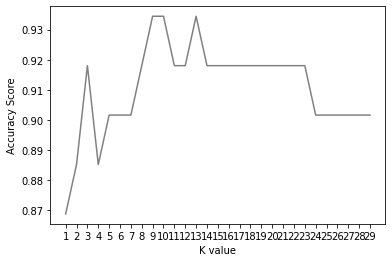

In [48]:
accuracyScores = []

for x in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))
    
# Plotting distribution of accuracy scores given different K values
sns.lineplot(range(1,30), accuracyScores, color="gray")
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2) 

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

<b> When k = 7

In [49]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 90.2%


<b> When k = 8

In [50]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 91.8%


<b> When k = 9

In [51]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 93.4%


Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

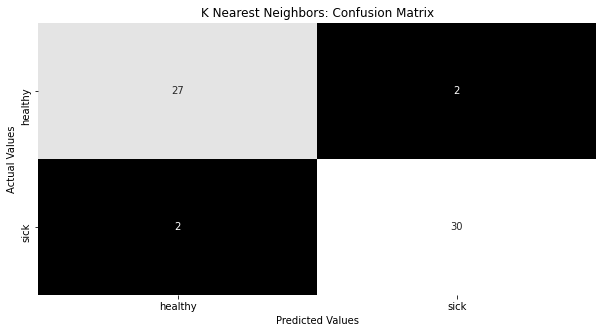

In [52]:
labels_predicted = knn.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='gray', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')

In [53]:
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.93      0.93      0.93        29
        sick       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



<b> Summary: </b>

A valuable insight in the field of healthcare analytics is being able to reproduce research results. In this section we attempt to tackle the question, "Given a similar study, can we optimize results so that we can drive down marginal cost by streamlining testing?" Solving this problem allows us to streamline resources as it drives down marginal cost in terms of testing reproducibility. In our specific dataset, we answered the question can we predict whether or not an individual will get a diagnosis of heart failure or not and if so using the KNN algorithm how many data points should be looking at in order to maximize model accuracy. 

<b> Managerial Insight: </b>

Identifying specific values of K that will maximize our accuracy score allows us to eliminate unnecessary sampling and testing practices. In our model, our sample size is 299. Of course getting a greater sample size will allow us to have a more normalized distribution but as we have seen in our model above we are able to fit various sample sizes and maintain model accuracy above the 90% level. Our findings reaffirm that more does not equate to better, because we can use less resources to obtain optimum results. 

## Insight 3: Amongst KNN and Logistic Regression, which model gives allows us to get the greatest predictibility of heart disease for each patient?

Since our KNN analysis can be found in insight #2, below I will plot our logistic regression machine learning algorithm and compare model accuracy using the prescision score amongst healthy and unhealthy patients. 

In [54]:

logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 100.0%


Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

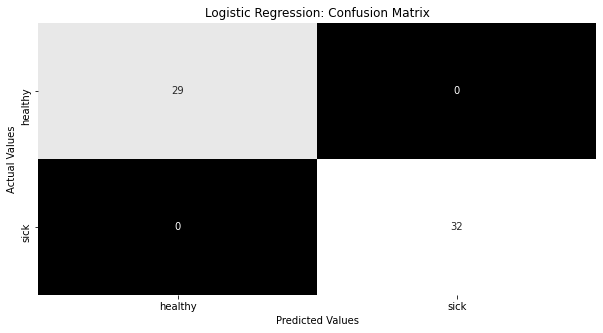

In [55]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='gray', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')

In [56]:
labels_predicted = logisticRegression.predict(features_test)
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00        29
        sick       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



Prescision score for a healthy diagnosis in our logistic regression.

In [57]:
precision = (round(29/32, 2))           
print(f"The precision score for a healthy diagnosis is {precision}")

The precision score for a healthy diagnosis is 0.91


Prescision score for a healthy diagnosis in KNN.

In [58]:
precision = (round(27/30, 2))           
print(f"The precision score for a healthy diagnosis is {precision}")

The precision score for a healthy diagnosis is 0.9


<b> Summary:</b>

A valuable insight in the field of healthcare is being able to predict diseases. Preventative care is the optimal way to avoid chornic diseases such as heart disease. If we are able to diagnose healthy and unhealthy patients it gives us the opportunity to provide best treatment care before symptoms worsen. Our model above allows us to do so with the Logistic Regression machine learning algorithm. In our model above we are able to predict whether or not a patient has heart disease or not with 100% accuracy.  

<b> Managerial Insight:</b>

Amongst our analysis of the KNN and Logsitic Regression machine learning model, we move forward to use the Logistic Regression machine learning algorithm model as the prescision score in this model is higher than our KNN model. As well as, we get a model accuracy score of 100%. The model overall returns fewer false negatives and minimizes type 2 error within our results. Since medical data is very sensitive, the patient could potentially not receive the medical treatment they need, therefore our second prediction model must be used in practice to avoid issues like these especially since lives are on the line.